<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_1_3_Lab_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Decision Boundary

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Toy Dataset

In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

pos = (y == 1)
neg = (y == 0)

## Plot Data

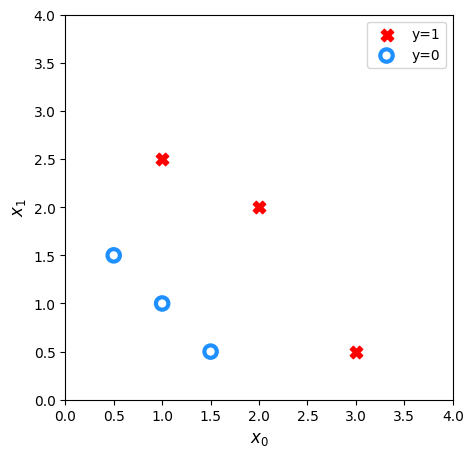

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X[pos, 0], X[pos, 1],
              marker='X', s=80, c='red', label='y=1')
ax.scatter(X[neg, 0], X[neg, 1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax.axis([0, 4, 0, 4])
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
ax.legend()

plt.show()

## Logistic regression model

This data has the form:

$$
f(x) = g(w_0x_0 + w_1x_1 + b)
$$

Suppose you have trained the model and get the following parameters:

$$
\begin{align}
&b = -3 \\
&w_1 = 1 \\
&w_2 = 1
\end{align}
$$

Then,

$$
f(x) = g(x_0 + x_1 - 3)
$$

### Refresher on logistic regression and decision boundary

The model is reprsented as:

$$
f_{\vec{w},b} = g(\vec{w}\cdot\vec{x}^{(i)} + b)
$$

where $g(z)$ is the sigmoid function and it maps all input values to values between 0 and 1:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

and $\vec{w}\cdot\vec{x}$ is the vector dot product:

$$
\vec{w}\cdot\vec{x} = w_0x_o + w_1x_1
$$

We interpret the output of the model, $f_{\vec{w},b}\left(\vec{x}\right)$, as the probability that $y = 1$ given $\vec{x}$ and parameterized by $\vec{w}$ and $b$. A threshold of $0.5$ can be chosen.

### Plot of the sigmoid function given a threshold of $0.5$

In [4]:
# the sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1 / (1 + np.exp(-z))
    return g

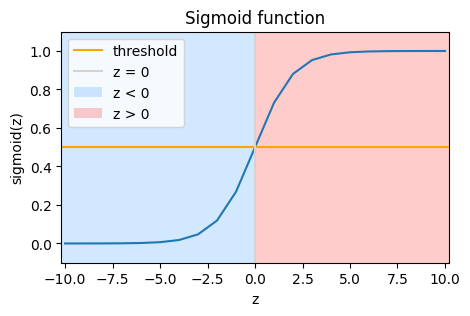

In [5]:
xmin = -10.2
xmax = 10.2
ymin = -0.1
ymax = 1.1

z = np.arange(-10, 11)

# plot the sigmoid function
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.plot(z, sigmoid(z))
ax.set_title('Sigmoid function')
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# plot threshold
plt.axhline(0.5, c='orange', label='threshold')

ax.axvline(0, c='lightgray', label='z = 0')
ax.fill_betweenx((ymin, ymax),
                 xmin, 0,
                 facecolor='dodgerblue',
                 alpha=0.2, label='z < 0')
ax.fill_betweenx((ymin, ymax),
                 0, xmax,
                 facecolor='red',
                 alpha=0.2, label='z > 0')
ax.legend()

plt.show()

In the above plot, $g(z) \gt 0$ when $z \ge 0$

For a logistic regression model, $z = \vec{w}\cdot\vec{x} + b$, therefore:

$$
\begin{align}
&\text{if } \vec{w}\cdot\vec{x} \ge 0 \text{ then the model predicts } y = 1 \\
&\text{if } \vec{w}\cdot\vec{x} \lt 0 \text{ then the model predicts } y = 0
\end{align}
$$

## Plotting the decision boundary

Our logistic model has the form:

$$
f(x) = g(x_0 + x_1 - 3)
$$

This model predicts $y = 1$ when

$$
\begin{align}
x_0 + x_1 - 3 &\ge 0 \\
x_1 &\ge = 3 - x_0
\end{align}
$$



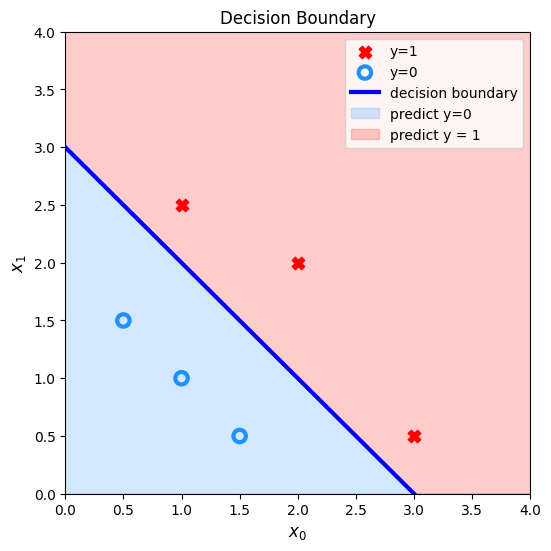

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(X[pos, 0], X[pos, 1],
              marker='X', s=80, c='red', label='y=1')
ax.scatter(X[neg, 0], X[neg, 1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')

# plot decision boundary
x0 = np.arange(0, 6)
ax.plot(x0, 3 - x0, c='b', lw=3, label='decision boundary')
ax.fill_between(x0, 3 - x0, color='dodgerblue', alpha=0.2, label='predict y=0')
ax.fill_between(x0, 3 - x0, 4, color='red', alpha=0.2, label='predict y = 1')

ax.axis([0, 4, 0, 4])
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_title('Decision Boundary')
ax.legend()

plt.show()